# Introduction
In this notebook, statistical analysis methods will be used to investigate the relationship between citation number and topics. More specifically, it is envised to perform research on if topic can be used to predict the citation. 
As always, the first step is to set up the environment and load functions. 

In [1]:
# set up the environment 
# Read the content of the setup script
setup_script = 'Setup/step4.py'

with open(setup_script, 'r') as file:
    setup_code = file.read()

# Execute the setup script
exec(setup_code)

Each paper is assigned a dominant topic using either Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF). These dominant topics are then used to categorize the papers into 20 distinct groups. To investigate the differences in mean citation counts across these groups, we will perform a statistical test. The hypotheses for this test are as follows:

- **Null Hypothesis (H0)**: The mean citation count is the same for all groups.
- **Alternative Hypothesis (H1)**: The mean citation count differs among the groups.

We will use Analysis of Variance (ANOVA) to conduct this test.

In [2]:
# Read the CSV file
file_path = 'ProcessedData/lda_for_regression.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Perform ANOVA
model = ols('n_citation ~ C(dominant_topic)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq      df         F    PR(>F)
C(dominant_topic)  4.432083e+05    19.0  1.147219  0.294769
Residual           1.793804e+08  8822.0       NaN       NaN


After performing the ANOVA test on the dataset, we obtained the following results:

- The sum of squares (sum_sq) for the factor "C(dominant_topic)" is 4.432083e+05.
- The degrees of freedom (df) for the factor "C(dominant_topic)" is 19.0.
- The F-statistic (F) for the ANOVA test is 1.147219.
- The p-value (PR(>F)) for the ANOVA test is 0.294769.

These results indicate that there is no significant difference in the mean citation count among the different groups defined by the dominant topic.

Please note that the ANOVA test assumes the null hypothesis that the mean citation count is the same for all groups. The obtained p-value of 0.294769 suggests that we fail to reject the null hypothesis, indicating that there is no evidence to support a significant difference in the mean citation count among the groups.

However, one of the assumptions for ANOVA is that the data follows a normal distribution, which might not be the case here. The next step is to check the normality of the data. This can be done using normality tests such as the Shapiro-Wilk test, Q-Q plots, or the Kolmogorov-Smirnov test.

In [10]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on the n_citation column
stat, p = shapiro(data['n_citation'])

# Print the results
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')

Shapiro-Wilk Test:
Statistic: 0.14591550827026367, p-value: 0.0
Shapiro-Wilk Test:
Statistic: 0.13504594564437866, p-value: 0.0


C:\Users\feng\.conda\envs\mygensim\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test was used to assess the normality of the citation data. The test returned a very low statistic (0.135) and a p-value of 0.0, indicating that the citation data significantly deviates from a normal distribution.

Given this result, the normality assumption for ANOVA is violated. Therefore, we will consider the following two alternatives:

1. **Data Transformation**: Apply transformations to the data to achieve normality.
2. **Non-parametric Test**: Use a non-parametric test that does not assume normality, such as the Kruskal-Wallis test.

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Apply a logarithmic transformation to the n_citation column
data['log_n_citation'] = np.log(data['n_citation'] + 1)

# Perform ANOVA on transformed data
model_log = ols('log_n_citation ~ C(dominant_topic)', data=data).fit()
anova_table_log = sm.stats.anova_lm(model_log, typ=2)

# Print the ANOVA table
print(anova_table_log)

                         sum_sq      df         F    PR(>F)
C(dominant_topic)    128.127529    19.0  3.075667  0.000007
Residual           19342.680589  8822.0       NaN       NaN


In [5]:
import pandas as pd
from scipy.stats import kruskal

# Perform Kruskal-Wallis H Test
groups = data.groupby('dominant_topic')['n_citation'].apply(list)
stat, p = kruskal(*groups)

# Print the results
print('Kruskal-Wallis H Test:')
print(f'Statistic: {stat}, p-value: {p}') 

Kruskal-Wallis H Test:
Statistic: 59.060234952429, p-value: 5.444105286519811e-06


### Data Transformation and ANOVA Results

To address the normality issue, we applied a logarithmic transformation to the citation data and then performed an ANOVA test. The results are as follows:

- **Sum of Squares (C(dominant_topic))**: 128.127529
- **Degrees of Freedom (C(dominant_topic))**: 19
- **F-statistic**: 3.075667
- **p-value**: 0.000007

The very low p-value (< 0.05) indicates a statistically significant difference in the mean citation counts among the different dominant topic groups.

### Kruskal-Wallis H Test Results

Given the initial non-normal distribution of the citation data, we also performed a Kruskal-Wallis H test, a non-parametric alternative to ANOVA. The results are as follows:

- **Kruskal-Wallis H Statistic**: 59.060234952429
- **p-value**: 5.444105286519811e-06

The extremely low p-value (< 0.05) from the Kruskal-Wallis test further confirms a significant difference in citation counts among the different dominant topic groups.

### Conclusion

Both the ANOVA test on the log-transformed data and the Kruskal-Wallis H test on the original data provide strong evidence that the mean citation counts differ significantly across the 20 groups categorized by dominant topics.

- The ANOVA test indicates significant differences with an F-statistic of 3.075667 and a p-value of 0.000007.
- The Kruskal-Wallis H test supports this finding with a test statistic of 59.060234952429 and a p-value of 5.444105286519811e-06.

These results suggest that dominant topics play a significant role in the citation counts of the papers, and the differences in citations among these groups are statistically significant.

Having established that the mean citation counts among these groups are statistically significant, the next step is to use regression techniques for potential prediction. By applying regression analysis, we can model the relationship between dominant topics and citation counts, allowing us to predict citation counts based on the identified topics.

### Single Linear Regression Model

We begin with a single linear regression model where the number of citations serves as the dependent variable, and the topic loadings are the independent variables. This approach helps us understand how variations in the presence and strength of specific topics influence the number of citations an article receives.

The single linear regression model can be represented as:

𝑌=
𝛽
0
+
𝛽
1
𝑋
1
+
𝜖

Where:
- 𝑌 is the dependent variable representing the number of citations.
- 𝛽0 is the intercept.
- 𝛽1 is the coefficient for the independent variable 𝑋1, which represents the topic loadings.
- 𝜖 is the error term.

By fitting this model to our data, we aim to estimate the coefficients 𝛽0 and 𝛽1, which will provide insights into the strength and direction of the relationship between dominant topics and citation counts. A significant positive coefficient would indicate that higher loadings on certain topics are associated with an increase in citation counts, while a significant negative coefficient would suggest the opposite.

### Model Evaluation

To assess the goodness-of-fit of our model, we will use metrics such as the R-squared value. The R-squared value indicates how well our independent variable (topic loadings) explains the variability in the dependent variable (citation counts). A higher R-squared value implies a better fit of the model to the data.

### Future Steps

This initial application of single linear regression sets the foundation for more complex models, such as multiple linear regression, which can incorporate multiple independent variables (various topic loadings) simultaneously. By progressively refining our models, we aim to enhance the accuracy and predictive power of our analysis, ultimately contributing to a deeper understanding of the factors driving citation counts in academic literature.

In [15]:
import statsmodels.api as sm

# Define the dependent variable
y = data['n_citation']

# Define the independent variable
X = data[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19']]

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             n_citation   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.352
Date:                Sat, 27 Jul 2024   Prob (F-statistic):              0.135
Time:                        10:13:23   Log-Likelihood:                -56390.
No. Observations:                8842   AIC:                         1.128e+05
Df Residuals:                    8821   BIC:                         1.130e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -326.9889    177.735     -1.840      0.0

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the dependent variable
y = data['n_citation']

# Define the independent variables
X = data[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8105.646896608254
R-squared: -0.09299113695978112


In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the dependent variable
y = data['n_citation']

# Define the independent variables
X = data[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Epoch 1/100
177/177 [==============================] - 1s 5ms/step - loss: 28324.9043 - val_loss: 7264.7319
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 27785.4570 - val_loss: 7175.0283
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 27722.2500 - val_loss: 7182.7866
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 27693.0117 - val_loss: 7190.5166
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 27673.8887 - val_loss: 7189.7632
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 27647.6016 - val_loss: 7200.6113
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 27635.5742 - val_loss: 7219.5830
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 27621.6719 - val_loss: 7207.9009
Epoch 9/100
177/177 [==============================] - 1s 4ms/step - loss: 27620.2422 - val_loss: 7220.1655
Epoch 10/100
177/177 [======

Epoch 1/100
222/222 [==============================] - 1s 6ms/step - loss: 24015.0898 - mae: 29.5355 - val_loss: 7505.1929 - val_mae: 33.7872
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: 23636.1445 - mae: 34.9033 - val_loss: 7461.5479 - val_mae: 35.2526
Epoch 3/100
222/222 [==============================] - 1s 4ms/step - loss: 23596.0625 - mae: 35.6296 - val_loss: 7448.8896 - val_mae: 35.7612
Epoch 4/100
222/222 [==============================] - 1s 5ms/step - loss: 23575.3828 - mae: 35.9366 - val_loss: 7447.9771 - val_mae: 35.6575
Epoch 5/100
222/222 [==============================] - 1s 5ms/step - loss: 23558.5020 - mae: 35.4541 - val_loss: 7444.0420 - val_mae: 36.6858
Epoch 6/100
222/222 [==============================] - 0s 2ms/step - loss: 23545.0195 - mae: 36.0825 - val_loss: 7444.9614 - val_mae: 36.4486
Epoch 7/100
222/222 [==============================] - 1s 4ms/step - loss: 23532.4277 - mae: 36.3474 - val_loss: 7450.2085 - val_mae: 35.2905
Epoch 

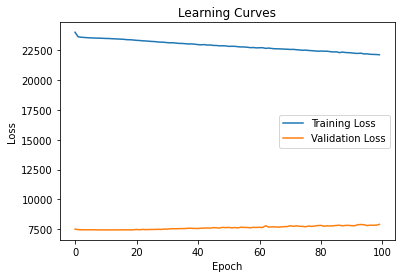

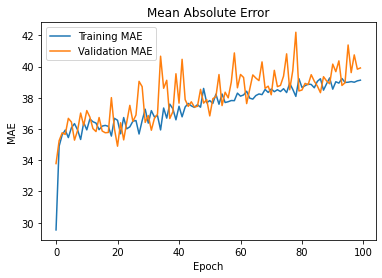

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.show()


In [19]:
pip install tensorflow==2.13.0

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'C:\\Users\\feng\\.conda\\envs\\mygensim\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'



  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


Consider using the `--user` option or check the permissions.



In [12]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'data' is your DataFrame and 'dominant_topic' is the categorical variable
# Convert the categorical variable into dummy/indicator variables
X = pd.get_dummies(data['dominant_topic'], drop_first=True)

# Define the dependent variable
y = data['n_citation']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             n_citation   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.147
Date:                Sat, 27 Jul 2024   Prob (F-statistic):              0.295
Time:                        10:08:42   Log-Likelihood:                -56393.
No. Observations:                8842   AIC:                         1.128e+05
Df Residuals:                    8822   BIC:                         1.130e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1896      4.196      8.387      0.0

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame and 'dominant_topic' is the categorical variable
# Convert the categorical variable into dummy/indicator variables
X = pd.get_dummies(data['dominant_topic'], drop_first=True)

# Define the dependent variable
y = data['n_citation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7492.065223222995
R-squared: -0.010253837967437507


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame and 'dominant_topic' is the categorical variable
# Convert the categorical variable into dummy/indicator variables
X = pd.get_dummies(data['dominant_topic'], drop_first=True)

# Define the dependent variable
y = data['n_citation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.9min finished


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 7483.502230339643
R-squared: -0.00909917684701922
